In [4]:
import numpy as np, pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [5]:
bright_features = pd.read_csv('b2000_features.csv')
bright_features.drop(columns=['Unnamed: 0'],inplace=True)
bright_sample = pd.read_csv('../data/bright_sample/brightest_2000_per_bin.csv.gz')

FileNotFoundError: File b'b2000_features.csv' does not exist

In [6]:
timeout_names = np.setdiff1d(bright_sample['original_ext_source_id'].values,bright_features['Name'].values)
len(timeout_names)
#first is just a dense lightcurve, second is too short.

NameError: name 'bright_sample' is not defined

In [ ]:
bright_good = bright_features.dropna()

bright = pd.merge(bright_sample,bright_good,left_on='original_ext_source_id',right_on='Name')
len(bright)

In [1]:
def plot_CMDs(df, col=None, cfunc=None, clim=None, points='scatter', *args, **kwargs):
    """
    Plot 2 CMDs side-by-side: first Gaia then WISE
    
    Parameters
    ----------
    df : `~pandas.DataFrame`
        Contains all the columns you need to generate CMDs
    col : str
        Column to color points by, default behavior is to just plot density if points='hexbin'
    cfunc : function
        If not None, will apply the given function to the color array. E.g., abs, np.reciprocal, etc.
    clim : array-like
        Array-like of length 2. If given, sets the colorbar limits
    points : str
        If points='scatter', calls plt.scatter. If points='hexbin', calls plt.hexbin
    *args, **kwargs
        Passed to the plotting function
        
    Returns
    _______
    fig, optax, irax
        Pyplot figure and axes objects
    """
    
    assert points in ['scatter','hexbin'], 'Please use points="scatter" or "hexbin"'
    
    fig, axes = plt.subplots(1,2,figsize=(12,5))
    
    optax = axes[0]
    irax = axes[1]
    
    opt_color = df['phot_bp_mean_mag'] - df['phot_rp_mean_mag']
    opt_mag = df['M_G']
    
    optax.set(xlabel=r'$G_{BP}-G_{RP}$',ylabel='$M_G$')
    
    ir_color = df['w1mpro'] - df['w2mpro']
    ir_mag = df['w1mpro'] + 5 * np.log10(df['parallax']) - 10
    
    irax.set(xlabel=r'$W1-W2$',ylabel=r'$M_{W1}$')
    
    if col is not None:
        if cfunc is not None:
            color = cfunc(df[col])
            clab = '{0} ${1}$'.format(cfunc.__name__,col)
        else:
            color = df[col]
            clab = '${0}$'.format(col)
    
    if points=='scatter':
        if col is not None:
            opt_obj = optax.scatter(opt_color,opt_mag,c=color,*args,**kwargs)
            ir_obj = irax.scatter(ir_color,ir_mag,c=color,*args,**kwargs)
        else:
            optax.scatter(opt_color,opt_mag,*args,**kwargs)
            irax.scatter(ir_color,ir_mag,*args,**kwargs)
            
    elif points=='hexbin':
        if col is not None:
            opt_obj = optax.hexbin(opt_color,opt_mag,C=color,*args,**kwargs)
            ir_obj = irax.hexbin(ir_color,ir_mag,C=color,*args,**kwargs)
        else:
            opt_obj = optax.hexbin(opt_color,opt_mag,*args,**kwargs)
            ir_obj = irax.hexbin(ir_color,ir_mag,*args,**kwargs)
    
    for ax in axes:
        ax.invert_yaxis()
    
    if col is not None:
    
        plt.colorbar(ir_obj,ax=[optax,irax,colax],label=clab)
        if clim is not None:
            opt_obj.set_clim(*clim)
            ir_obj.set_clim(*clim)
        
    elif points=='hexbin':
        
        plt.colorbar(ir_obj,ax=[optax,irax,colax])
        if clim is not None:
            opt_obj.set_clim(*clim)
            ir_obj.set_clim(*clim)
            
    return fig,optax,irax

In [216]:
def plot_color_color(df, col=None, cfunc=None, clim=None, points='scatter', *args, **kwargs):
    """
    Plot BP-RP vs. W1-W2
    
    Parameters
    ----------
    df : `~pandas.DataFrame`
        Contains all the columns you need to generate CMDs
    col : str
        Column to color points by, default behavior is to just plot density if points='hexbin'
    cfunc : function
        If not None, will apply the given function to the color array. E.g., abs, np.reciprocal, etc.
    clim : array-like
        Array-like of length 2. If given, sets the colorbar limits
    points : str
        If points='scatter', calls plt.scatter. If points='hexbin', calls plt.hexbin
    *args, **kwargs
        Passed to the plotting function
        
    Returns
    _______
    fig, ax
        Pyplot figure and axes objects
    """
    
    assert points in ['scatter','hexbin'], 'Please use points="scatter" or "hexbin"'
    
    fig, ax = plt.subplots(1,figsize=(8,6))
    
    opt_color = df['phot_bp_mean_mag'] - df['phot_rp_mean_mag']
    ir_color = df['w1mpro'] - df['w2mpro']
    
    ax.set(xlabel=r'$W1-W2$',ylabel=r'$G_{BP}-G_{RP}$')
    
    if col is not None:
        if cfunc is not None:
            color = cfunc(df[col])
            clab = '{0} ${1}$'.format(cfunc.__name__,col)
        else:
            color = df[col]
            clab = '${0}$'.format(col)
    
    if points=='scatter':
        if col is not None:
            col_obj = ax.scatter(ir_color,opt_color,c=color,*args,**kwargs)
        else:
            ax.scatter(ir_color,opt_color,*args,**kwargs)
            
    elif points=='hexbin':
        if col is not None:
            col_obj = ax.hexbin(ir_color,opt_color,C=color,*args,**kwargs)
        else:
            col_obj = ax.hexbin(ir_color,opt_color,*args,**kwargs)
    
    for ax in axes:
        ax.invert_yaxis()
    
    if col is not None:
    
        plt.colorbar(col_obj,ax=ax,label=clab)
        if clim is not None:
            col_obj.set_clim(*clim)
        
    elif points=='hexbin':
        
        plt.colorbar(col_obj,ax=ax)
        if clim is not None:
            col_obj.set_clim(*clim)
            
    return fig,ax

In [ ]:
def plot_3_plots(df, col=None, cfunc=None, clim=None, points='scatter', *args, **kwargs):
    """
    Plot 2 CMDs side-by-side: first Gaia then WISE. Then plot the color-color plot
    
    Parameters
    ----------
    df : `~pandas.DataFrame`
        Contains all the columns you need to generate CMDs
    col : str
        Column to color points by, default behavior is to just plot density if points='hexbin'
    cfunc : function
        If not None, will apply the given function to the color array. E.g., abs, np.reciprocal, etc.
    clim : array-like
        Array-like of length 2. If given, sets the colorbar limits
    points : str
        If points='scatter', calls plt.scatter. If points='hexbin', calls plt.hexbin
    *args, **kwargs
        Passed to the plotting function
        
    Returns
    _______
    fig, optax, irax, colax
        Pyplot figure and axes objects
    """
    
    assert points in ['scatter','hexbin'], 'Please use points="scatter" or "hexbin"'
    
    fig, axes = plt.subplots(1,3,figsize=(15,5))
    
    optax = axes[0]
    irax = axes[1]
    
    opt_color = df['phot_bp_mean_mag'] - df['phot_rp_mean_mag']
    opt_mag = df['M_G']
    
    optax.set(xlabel=r'$G_{BP}-G_{RP}$',ylabel='$M_G$')
    
    ir_color = df['w1mpro'] - df['w2mpro']
    ir_mag = df['w1mpro'] + 5 * np.log10(df['parallax']) - 10
    
    irax.set(xlabel=r'$W1-W2$',ylabel=r'$M_{W1}$')
    
    if col is not None:
        if cfunc is not None:
            color = cfunc(df[col])
            clab = '{0} ${1}$'.format(cfunc.__name__,col)
        else:
            color = df[col]
            clab = '${0}$'.format(col)
    
    if points=='scatter':
        if col is not None:
            opt_obj = optax.scatter(opt_color,opt_mag,c=color,*args,**kwargs)
            ir_obj = irax.scatter(ir_color,ir_mag,c=color,*args,**kwargs)
        else:
            optax.scatter(opt_color,opt_mag,*args,**kwargs)
            irax.scatter(ir_color,ir_mag,*args,**kwargs)
            
    elif points=='hexbin':
        if col is not None:
            opt_obj = optax.hexbin(opt_color,opt_mag,C=color,*args,**kwargs)
            ir_obj = irax.hexbin(ir_color,ir_mag,C=color,*args,**kwargs)
        else:
            opt_obj = optax.hexbin(opt_color,opt_mag,*args,**kwargs)
            ir_obj = irax.hexbin(ir_color,ir_mag,*args,**kwargs)
    
    for ax in axes:
        ax.invert_yaxis()
    
    if col is not None:
    
        plt.colorbar(ir_obj,ax=[optax,irax,colax],label=clab)
        if clim is not None:
            opt_obj.set_clim(*clim)
            ir_obj.set_clim(*clim)
        
    elif points=='hexbin':
        
        plt.colorbar(ir_obj,ax=[optax,irax,colax])
        if clim is not None:
            opt_obj.set_clim(*clim)
            ir_obj.set_clim(*clim)
            
    return fig,optax,irax

In [2]:
fig, optax, irax = plot_CMDs(bright, points='hexbin', mincnt=1, bins='log', cmap='Spectral')
optax.set(xlim=(-0.25,6.5),ylim=(0,-7.5))
irax.set(xlim=(-0.3,1),ylim=(-1,-15))

NameError: name 'bright' is not defined

[(-0.25, 6.5), (-0.3, 1)]

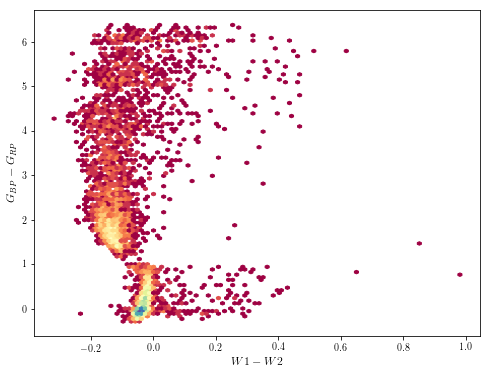

In [217]:
fig, ax = plot_color_color(bright, points='hexbin', mincnt=1, bins='log', cmap='Spectral')
ax.set(xlim=(-0.3,1),ylim=(-0.25,6.5))

[(-1, -15), (-0.3, 1)]

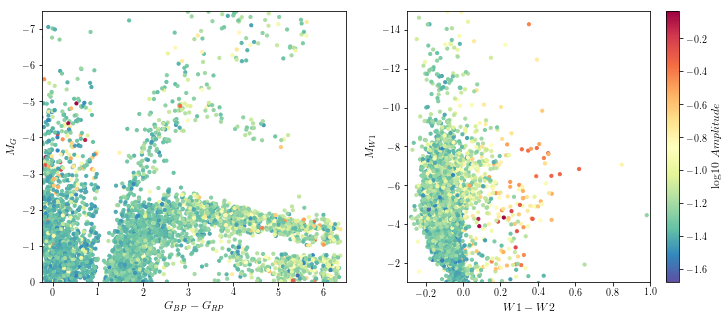

In [163]:
fig, optax, irax = plot_CMDs(bright, col='Amplitude', cfunc=np.log10, s=10, points='scatter', cmap='Spectral_r')
optax.set(xlim=(-0.25,6.5),ylim=(0,-7.5))
irax.set(xlim=(-0.3,1),ylim=(-1,-15))

[(-1, -15), (-0.3, 1)]

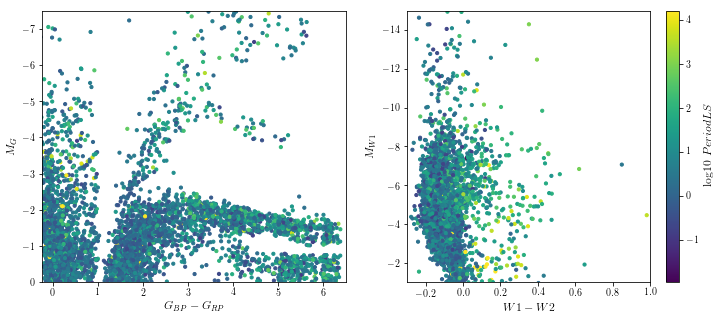

In [164]:
fig, optax, irax = plot_CMDs(bright, col='PeriodLS', s=10, cfunc=np.log10, points='scatter')
optax.set(xlim=(-0.25,6.5),ylim=(0,-7.5))
irax.set(xlim=(-0.3,1),ylim=(-1,-15))

[(-1, -15), (-0.3, 1)]

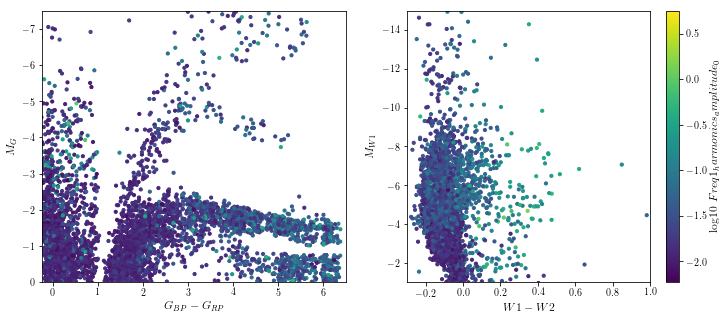

In [165]:
fig, optax, irax = plot_CMDs(bright, col='Freq1_harmonics_amplitude_0', s=10, cfunc=np.log10, points='scatter')
optax.set(xlim=(-0.25,6.5),ylim=(0,-7.5))
irax.set(xlim=(-0.3,1),ylim=(-1,-15))

[(-1, -15), (-0.3, 1)]

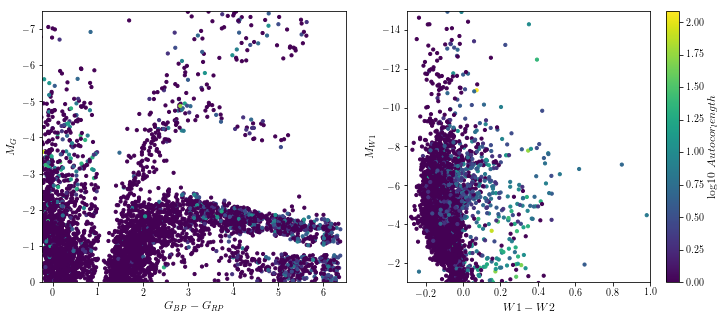

In [166]:
fig, optax, irax = plot_CMDs(bright, col='Autocor_length', cfunc=np.log10, s=10, points='scatter')
optax.set(xlim=(-0.25,6.5),ylim=(0,-7.5))
irax.set(xlim=(-0.3,1),ylim=(-1,-15))

[(-1, -15), (-0.3, 1)]

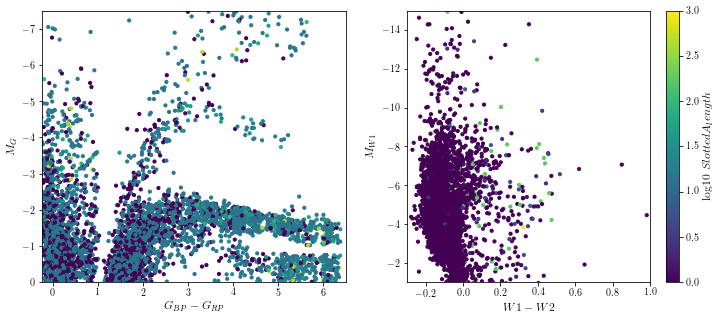

In [167]:
fig, optax, irax = plot_CMDs(bright, col='SlottedA_length', clim=(0,3), cfunc=np.log10, s=10, points='scatter')
optax.set(xlim=(-0.25,6.5),ylim=(0,-7.5))
irax.set(xlim=(-0.3,1),ylim=(-1,-15))

[(-1, -15), (-0.3, 1)]

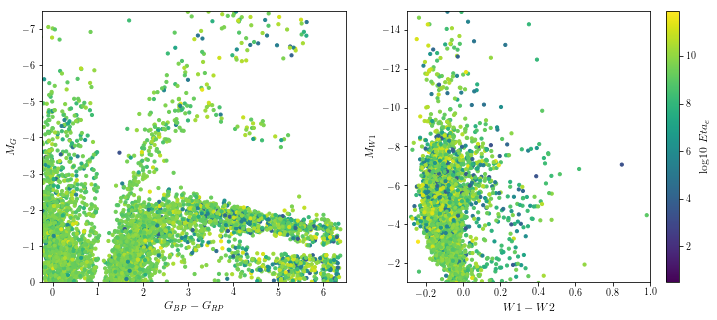

In [168]:
fig, optax, irax = plot_CMDs(bright, col='Eta_e', cfunc=np.log10, s=10, points='scatter')
optax.set(xlim=(-0.25,6.5),ylim=(0,-7.5))
irax.set(xlim=(-0.3,1),ylim=(-1,-15))

[(-1, -15), (-0.3, 1)]

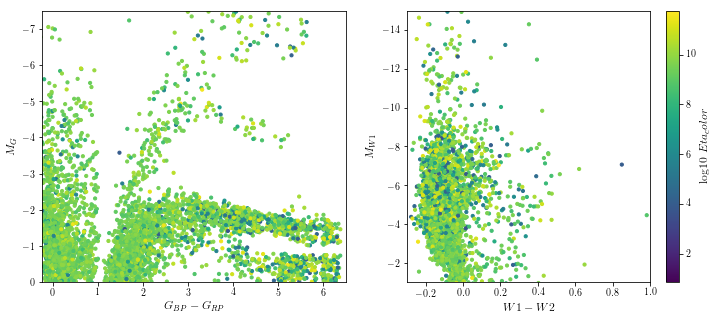

In [169]:
fig, optax, irax = plot_CMDs(bright, col='Eta_color', cfunc=np.log10, s=10, points='scatter')
optax.set(xlim=(-0.25,6.5),ylim=(0,-7.5))
irax.set(xlim=(-0.3,1),ylim=(-1,-15))

[(-1, -15), (-0.3, 1)]

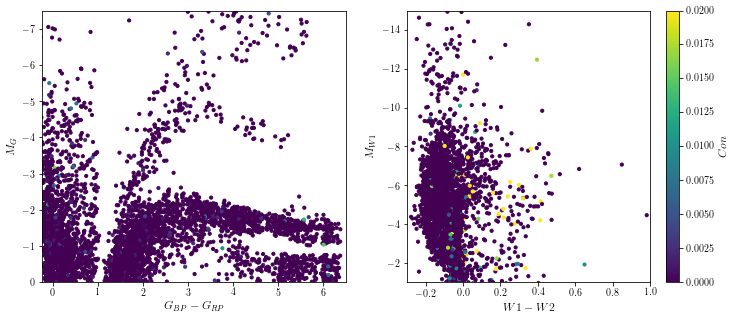

In [170]:
fig, optax, irax = plot_CMDs(bright, col='Con', clim=(0,0.02), s=10, points='scatter')
optax.set(xlim=(-0.25,6.5),ylim=(0,-7.5))
irax.set(xlim=(-0.3,1),ylim=(-1,-15))

[(-1, -15), (-0.3, 1)]

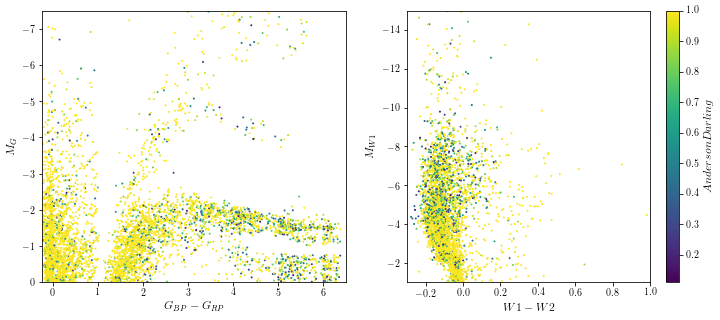

In [171]:
fig, optax, irax = plot_CMDs(bright, col='AndersonDarling', s=1, points='scatter')
optax.set(xlim=(-0.25,6.5),ylim=(0,-7.5))
irax.set(xlim=(-0.3,1),ylim=(-1,-15))

In [175]:
def log_inv(x):
    __name__ = 'Log Inverse'
    return np.log10(np.reciprocal(x))

[(-1, -15), (-0.3, 1)]

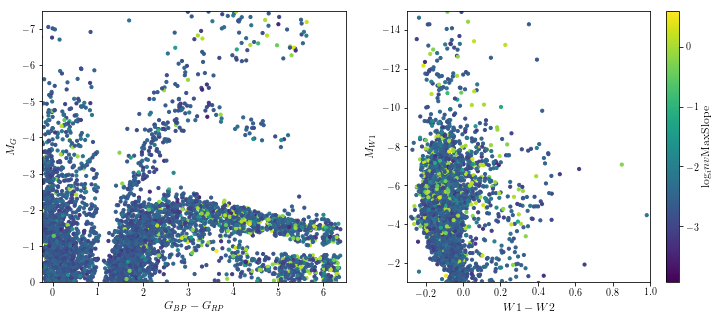

In [176]:
fig, optax, irax = plot_CMDs(bright, col='MaxSlope', cfunc=log_inv, clim=(), s=10, points='scatter')
optax.set(xlim=(-0.25,6.5),ylim=(0,-7.5))
irax.set(xlim=(-0.3,1),ylim=(-1,-15))

[(-1, -15), (-0.3, 1)]

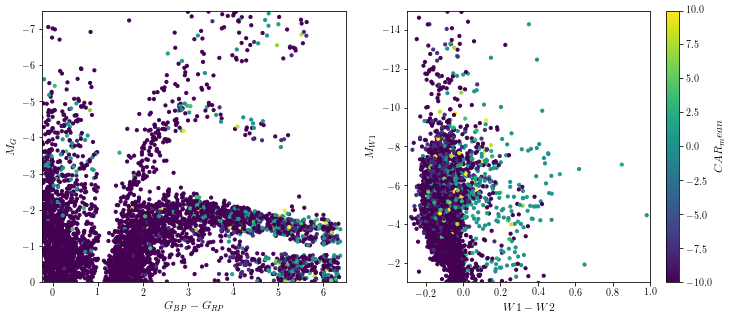

In [184]:
fig, optax, irax = plot_CMDs(bright, col='CAR_mean', clim=(-10,10), s=10, points='scatter')
optax.set(xlim=(-0.25,6.5),ylim=(0,-7.5))
irax.set(xlim=(-0.3,1),ylim=(-1,-15))

/Users/carina/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in log10


[(-1, -15), (-0.3, 1)]

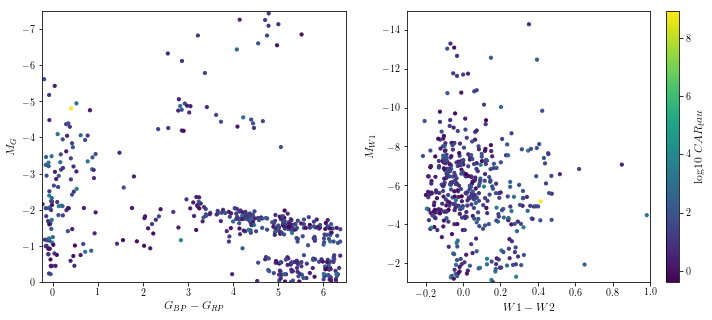

In [194]:
fig, optax, irax = plot_CMDs(bright, col='CAR_tau', cfunc=np.log10, s=10, points='scatter')
optax.set(xlim=(-0.25,6.5),ylim=(0,-7.5))
irax.set(xlim=(-0.3,1),ylim=(-1,-15))

[(-1, -15), (-0.3, 1)]

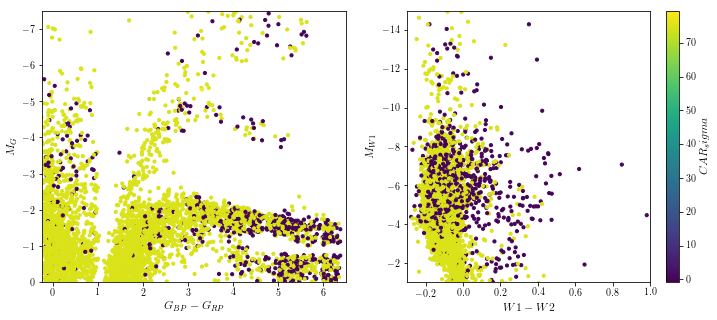

In [195]:
fig, optax, irax = plot_CMDs(bright, col='CAR_sigma', s=10, points='scatter')
optax.set(xlim=(-0.25,6.5),ylim=(0,-7.5))
irax.set(xlim=(-0.3,1),ylim=(-1,-15))

[(-1, -15), (-0.3, 1)]

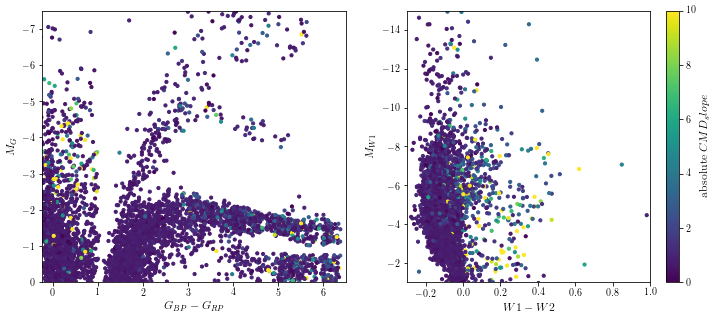

In [207]:
fig, optax, irax = plot_CMDs(bright, col='CMD_slope', cfunc=np.abs, clim=(0,10), s=10, points='scatter')
optax.set(xlim=(-0.25,6.5),ylim=(0,-7.5))
irax.set(xlim=(-0.3,1),ylim=(-1,-15))

[(-1, -15), (-0.3, 1)]

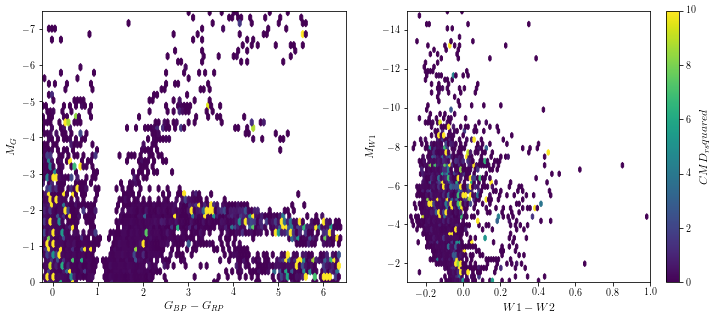

In [211]:
fig, optax, irax = plot_CMDs(bright, col='CMD_r_squared', clim=(0,10), points='hexbin', reduce_C_function=np.std)
optax.set(xlim=(-0.25,6.5),ylim=(0,-7.5))
irax.set(xlim=(-0.3,1),ylim=(-1,-15))

[(-1, -15), (-0.3, 1)]

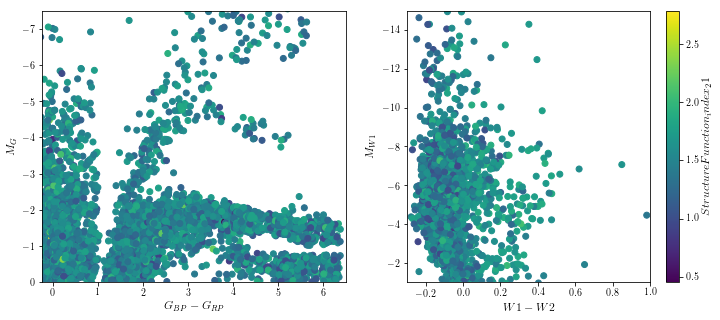

In [212]:
fig, optax, irax = plot_CMDs(bright, col='StructureFunction_index_21', points='scatter')
optax.set(xlim=(-0.25,6.5),ylim=(0,-7.5))
irax.set(xlim=(-0.3,1),ylim=(-1,-15))

[(-1, -15), (-0.3, 1)]

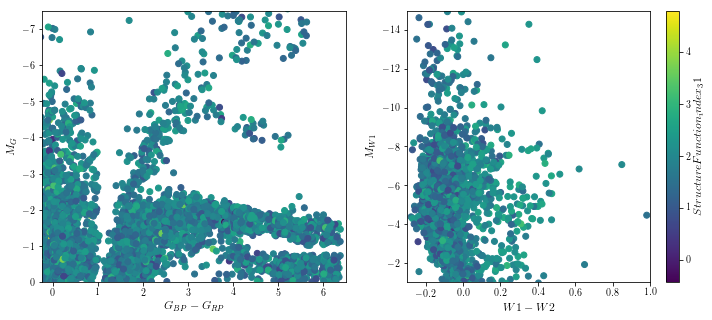

In [213]:
fig, optax, irax = plot_CMDs(bright, col='StructureFunction_index_31', points='scatter')
optax.set(xlim=(-0.25,6.5),ylim=(0,-7.5))
irax.set(xlim=(-0.3,1),ylim=(-1,-15))

[(-1, -15), (-0.3, 1)]

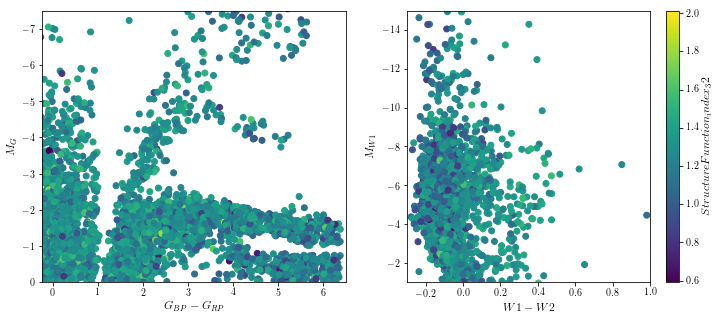

In [214]:
fig, optax, irax = plot_CMDs(bright, col='StructureFunction_index_32', points='scatter')
optax.set(xlim=(-0.25,6.5),ylim=(0,-7.5))
irax.set(xlim=(-0.3,1),ylim=(-1,-15))